In [1]:
# pip install kafka-python-ng

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from kafka import KafkaProducer
import json
from json import dumps
from time import sleep

In [3]:
pd.set_option("display.max_columns", None)

df = pd.read_csv('articles.csv')
customer_df = pd.read_csv('customers.csv')
trans_df = pd.read_csv('young_female_trans.csv')

df.head(5)

# print(df.shape[0])
# print(customer_df.shape[0])
# print(trans_df.shape[0])

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


# Initial Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [5]:
# Convert those items code/no into string instead of int
df['product_code'] = df['product_code'].apply(str)
df['product_type_no'] = df['product_type_no'].apply(str)
df['graphical_appearance_no'] = df['graphical_appearance_no'].apply(str)
df['colour_group_code'] = df['colour_group_code'].apply(str)
df['perceived_colour_value_id'] = df['perceived_colour_value_id'].apply(str)
df['perceived_colour_master_id'] = df['perceived_colour_master_id'].apply(str)
df['department_no'] = df['department_no'].apply(str)
df['index_code'] = df['index_code'].apply(str)
df['index_group_no'] = df['index_group_no'].apply(str)
df['section_no'] = df['section_no'].apply(str)
df['garment_group_no'] = df['garment_group_no'].apply(str)

df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [7]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337996 entries, 0 to 1337995
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1337996 non-null  object 
 1   customer_id       1337996 non-null  object 
 2   article_id        1337996 non-null  int64  
 3   price             1337996 non-null  float64
 4   sales_channel_id  1337996 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 51.0+ MB


In [8]:
df.describe()

,article_id
count,1.055420e+05
mean,6.984246e+08
std,1.284624e+08
min,1.087750e+08
25%,6.169925e+08
50%,7.022130e+08
75%,7.967030e+08
max,9.594610e+08


In [9]:
df.describe(include="object").T

,count,unique,top,freq
product_code,105542,47224,783707,75
prod_name,105542,45875,Dragonfly dress,98
product_type_no,105542,132,272,11169
product_type_name,105542,131,Trousers,11169
product_group_name,105542,19,Garment Upper body,42741
graphical_appearance_no,105542,30,1010016,49747
graphical_appearance_name,105542,30,Solid,49747
colour_group_code,105542,50,9,22670
colour_group_name,105542,50,Black,22670
perceived_colour_value_id,105542,8,4,42706


Here omitted part ..

<!-- `prod_code` & `prod_name`                   : There are a total 47,224 of unique product code and 45,875 of unique product name, indicates some of the product code are sharing the product name. The most frequent product is "Dragonfly dress", it appears 98 times within the dataset. \
\
`product_type_code` & `product_type_name`   : There are 132 unique of product type code and 131 unique of product type name. The top most product type is "Trousers", it appears 1,169 times. There is some minor different total counts, which might need to dig inside later. \
\
`product_group_name`                        : There are 19 unique product type and most frequent produce group is "Garment Upper Body", which accounts for around 40% of the product group. \
\
`graphical_appearance_no` & `graphical_appearance_name`         : Both of them having 30 unique of graphical appearance. The top graphical appearance is "Solid", it appears 49,747 times. \
\
`colour_group_code` & `colour_group_name`   : There are 50 unique colors in the product. The most frequent is "black" color which appear 22,670 times. \
\
`perceived_colour_value_id` & `perceived_colour_value_name`     : There are 8 unique perceived colors in the product. The most frequent is "Dark" color which appear 42,706 times. \
\
`perceived_colour_master_id` & `perceived_colour_master_name`   : There are 20 unique perceived colors in the product. The most frequent is "Black" color which appear 22,585 times. \
\
`department_no` & `department_name`         : There are 299 departments, the most department name is Jersey.  \
\
`index_code` & `index_name`                 : There are 10 unique index code, the top most index product is ladieswear, which appears for 26,001. \
\
`index_group_no` & `index_group_name`       : There are 5 unique index group code, the top most index product is ladieswear, which appears for 39,737. \
\
`section_no` & `section_name`               : There are 57 unique section code, but 56 in section name, the top most index product is ladieswear, which appears for 7,295. There is a minor different counts between section no and section name.  \
\
`garment_group_no` & `garment_group_name`   : There are 21 unique index code, the top most index product is ladieswear, which appears for 21,445. \
\
`detail_desc`                               : There are 43,404 of detail description, indicates some of the product code are sharing the same detail desc.
\ -->

In [10]:
customer_df.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [11]:
customer_df.describe(include="object").T

,count,unique,top,freq
customer_id,1371980,1371980,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1
club_member_status,1365918,3,ACTIVE,1272491
fashion_news_frequency,1355969,3,NONE,877711
postal_code,1371980,352899,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303


In [12]:
trans_df.info()
trans_df["t_dat"] = pd.to_datetime(trans_df["t_dat"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337996 entries, 0 to 1337995
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1337996 non-null  object 
 1   customer_id       1337996 non-null  object 
 2   article_id        1337996 non-null  int64  
 3   price             1337996 non-null  float64
 4   sales_channel_id  1337996 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 51.0+ MB


In [13]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337996 entries, 0 to 1337995
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   t_dat             1337996 non-null  datetime64[ns]
 1   customer_id       1337996 non-null  object        
 2   article_id        1337996 non-null  int64         
 3   price             1337996 non-null  float64       
 4   sales_channel_id  1337996 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 51.0+ MB


In [14]:
trans_df.describe()

,t_dat,article_id,price,sales_channel_id
count,1337996,1.337996e+06,1.337996e+06,1.337996e+06
mean,2019-09-26 17:50:30.907716864,7.100114e+08,2.821994e-02,1.781094e+00
min,2018-09-20 00:00:00,1.087750e+08,1.525424e-04,1.000000e+00
25%,2019-04-13 00:00:00,6.557840e+08,1.659322e-02,2.000000e+00
50%,2019-09-13 00:00:00,7.256630e+08,2.540678e-02,2.000000e+00
75%,2020-04-04 00:00:00,7.991900e+08,3.388136e-02,2.000000e+00
max,2020-09-22 00:00:00,9.562170e+08,5.915254e-01,2.000000e+00
std,NaN,1.288919e+08,1.864222e-02,4.135047e-01


In [15]:
trans_df.describe(include="object").T


,count,unique,top,freq
customer_id,1337996,16595,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441


# Data Cleaning and Transformation

## Handle Missing Value

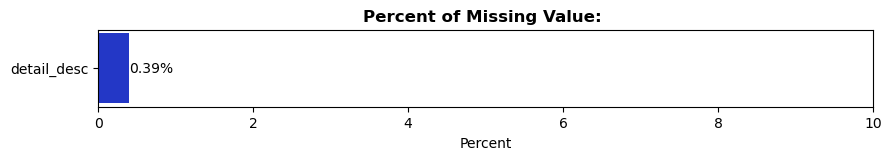

In [16]:
missing_data = df.isnull().sum()
missing_percent = ((missing_data[missing_data > 0]) / df.shape[0]) * 100

missing_percent.sort_values(ascending=True, inplace=True)

fig, ax= plt.subplots(figsize=(10, 1))
ax.barh(missing_percent.index, missing_percent, color="#2337C6")

for i, (value, name) in enumerate(zip(missing_percent, missing_percent.index)):
    ax.text(value, i, f"{value:.2f}%", ha='left', va='center')

ax.set_xlim([0,10])
plt.title("Percent of Missing Value: ", fontweight="bold")
plt.xlabel("Percent", fontsize=10)
plt.show()


In [17]:
df[df["detail_desc"].isnull()].head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,2,Medium Dusty,12,Grey,5962,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3040,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,4,Dark,11,Beige,3040,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,4,Dark,12,Grey,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN


In [18]:
# df = df.dropna(subset={'detail_desc'})
df["detail_desc"] = df["detail_desc"].fillna("No Description")

In [19]:
df.isnull().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64

In [20]:
missing_cust_data = customer_df.isnull().sum()
print(missing_cust_data)

# customer_df[customer_df["club_member_status"].isnull()].head()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64


In [21]:
customer_df["FN"] = customer_df["FN"].fillna(0)
customer_df["Active"] = customer_df["Active"].fillna(0)
customer_df["club_member_status"] = customer_df["club_member_status"].fillna("UNKNOWN")
customer_df["fashion_news_frequency"] = customer_df["fashion_news_frequency"].fillna("UNKNOWN")
customer_df["age"] = customer_df["age"].fillna(customer_df["age"].median()) # fill with age median?

In [22]:
customer_df.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

In [23]:
missing_trans_data = trans_df.isnull().sum()
print(missing_trans_data)

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


## Handling Duplicates

In [24]:
dup_rows = df[df.duplicated(keep=False)]
dup_rows_sorted = dup_rows.sort_values(by=["product_code"])
# dup_rows_sorted.head()
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

dup_cust_rows = customer_df[customer_df.duplicated(keep=False)]
dup_cust_rows_sorted = dup_cust_rows.sort_values(by=['customer_id'])
print(f"The customers dataset contains {customer_df.duplicated().sum()} duplicate rows that need to be removed")

dup_tran_rows = trans_df[trans_df.duplicated(keep=False)]
dup_tran_rows_sorted = dup_tran_rows.sort_values(by=["t_dat","customer_id"])
print(f"The transactions dataset contains {trans_df.duplicated().sum()}")

The dataset contains 0 duplicate rows that need to be removed.
The customers dataset contains 0 duplicate rows that need to be removed
The transactions dataset contains 139868


In [25]:
df.shape[0]

105542

# Correcting product name

In [26]:
unique_prod_name = df["prod_name"].unique() # unique the column
print(len(unique_prod_name)) # count have how many unique record

nlist = []
for word in unique_prod_name:
    if "(" in word and ")" in word:
        start_index = word.find("(")+1
        end_index = word.find(")")
        content = word[start_index:end_index]
        if(content.isdigit()):
            nlist.append(word)

print(nlist)

45875
['Strap top (1)', 'Pirate Leggings (1)', '2 Row Braided Headband (1)', 'Long Leggings (1)', 'SPANX ALOT swimsuit (1)', 'Carolina sweater (1)', 'Linni tee (1)', 'Classic Fancy pilot (1)', '4p Elastic Headband (1)', 'Flora hip belt (1)', 'Theron (1)', 'Tess tee (1)', 'Minna highwaist leggings (1)', 'Lory sweatpants (1)', 'Shaper Shorts (1)', 'Flirty Kattis Cat (1)', 'Lena Rib Dress (1)', 'Kevin softshell jacket (1)', 'Sanne treggings (1)', 'Tilda clean padded bra (1)', 'Rose lace (1)', 'Skinny Cheapo 89 (1)', 'Biker Leggings (1)', 'Edit dress (1)', 'Victoria (1)', 'Lee (1)', 'LOLLY SKIRT (1)', 'SIGGE LICENSE (1)', 'Christmas pyjama (1)', 'SKINNY Price 89 (1)', 'LAZER RAZER brief (1)', 'Fred Basic (1)', 'Sara long (1)', 'Anita Tank (1)', 'Tail tee (1)', 'ANTHEA pj (1)', 'Wilma dress (1)', 'Hat Frank Fedora(1)', 'EASY PEASY swimsuit (1)', 'Flirty Milkyway Eardeco (1)', 'Wanda Dress (1)', 'Petit cross bag (1)', 'Poppy Poncho (1)', 'Ida Padded bra (1)', 'MIA (1)', 'MUMS (1)', 'Skinny L

In [27]:
def remove_parentheses(text):
    words = text.split()
    return " ".join(word for word in words if "(" not in word and ")" not in word)

In [28]:
df["prod_name"] = df["prod_name"].apply(remove_parentheses) # apply custom function

df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top,253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt,306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt,306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [29]:
trans_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,00be0a263381af38132d31225e8fb12fbc527c654b4464...,644522001,0.059305,2
1,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
2,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
3,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
4,2018-09-20,0137b87739a796f65396d8483173f66318039d19a2583f...,577992001,0.011254,2


In [30]:
customer_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [31]:
df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top,253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt,306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt,306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## Prepare dataframe

In [32]:
trans_df.rename(columns={"t_dat": "trans_date"}, inplace=True)
trans_df.head()

,trans_date,customer_id,article_id,price,sales_channel_id
0,2018-09-20,00be0a263381af38132d31225e8fb12fbc527c654b4464...,644522001,0.059305,2
1,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
2,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
3,2018-09-20,012bbedf2efe728a7407a5dc842a852f8e09e9ae972711...,651456003,0.016932,1
4,2018-09-20,0137b87739a796f65396d8483173f66318039d19a2583f...,577992001,0.011254,2


In [33]:
def create_date_table(start="2016-01-01", end="2026-12-31"):
    date_df = pd.DataFrame({"Date": pd.date_range(start, end)})
    date_df["day"] = date_df.Date.dt.day
    date_df["day_of_week"] = date_df.Date.dt.weekday
    date_df["week"] = date_df.Date.dt.strftime("%W") # %U is sunday as first day of the week, whereas %W is monday as first day of the week
    date_df["month"] = date_df.Date.dt.month
    date_df["month_name"] = date_df.Date.dt.strftime("%B")
    date_df["quarter"] = date_df.Date.dt.quarter
    date_df["year"] = date_df.Date.dt.year

    return date_df


In [34]:
date_dim = create_date_table()

In [35]:
date_dim.head()

,Date,day,day_of_week,week,month,month_name,quarter,year
0,2016-01-01,1,4,00,1,January,1,2016
1,2016-01-02,2,5,00,1,January,1,2016
2,2016-01-03,3,6,00,1,January,1,2016
3,2016-01-04,4,0,01,1,January,1,2016
4,2016-01-05,5,1,01,1,January,1,2016


In [36]:
customer_dim = customer_df.filter(['customer_id', 'active', 'club_member_status', 'fashion_news_frequency', 'age'])
customer_dim.head()

,customer_id,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0


In [37]:
df.rename(columns={'prod_name': 'product_name'}, inplace=True)

In [38]:
df.head()

,article_id,product_code,product_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top,253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt,306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt,306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [39]:
product_dim = df.filter(['article_id', 'product_code', 'product_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_name', 'index_group_name', 'section_no', 'section_name', 'garment_group_name', 'detail_desc'])

In [40]:
product_dim.head()

,article_id,product_code,product_name,product_type_no,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_no,department_name,index_name,index_group_name,section_no,section_name,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,Solid,Black,Dark,Black,1676,Jersey Basic,Ladieswear,Ladieswear,16,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,Solid,White,Light,White,1676,Jersey Basic,Ladieswear,Ladieswear,16,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top,253,Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,1676,Jersey Basic,Ladieswear,Ladieswear,16,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt,306,Bra,Underwear,Solid,Black,Dark,Black,1339,Clean Lingerie,Lingeries/Tights,Ladieswear,61,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt,306,Bra,Underwear,Solid,White,Light,White,1339,Clean Lingerie,Lingeries/Tights,Ladieswear,61,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [41]:
def send_json_data_kafka(topic, jdata):
    # create kafka producer
    producer = KafkaProducer(bootstrap_servers=['34.133.203.182:9092'], value_serializer=lambda x: dumps(x).encode('utf-8'))
    
    # create topic
    producer.send(topic, jdata)


In [77]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337996 entries, 0 to 1337995
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   trans_date        1337996 non-null  datetime64[ns]
 1   customer_id       1337996 non-null  object        
 2   article_id        1337996 non-null  int64         
 3   price             1337996 non-null  float64       
 4   sales_channel_id  1337996 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 51.0+ MB


KeyError: 'trans_fact'

In [79]:
producer = KafkaProducer(bootstrap_servers=['34.133.203.182:9092'], value_serializer=lambda x: json.dumps(x).encode('utf-8'))
# producer.flush()
trans_df["trans_date"] = trans_df["trans_date"].dt.strftime("%Y-%m-%d")
i =0 
for _, row in trans_df.iterrows():
    json_row = row.to_dict()
    
    send_json_data_kafka("trans_fact", json_row)
    
    i += 1
    if i == 100 : 
        sleep(10)
        break

In [ ]:
date_dim.head()

,Date,day,day_of_week,week,month,month_name,quarter,year
0,2016-01-01,1,4,00,1,January,1,2016
1,2016-01-02,2,5,00,1,January,1,2016
2,2016-01-03,3,6,00,1,January,1,2016
3,2016-01-04,4,0,01,1,January,1,2016
4,2016-01-05,5,1,01,1,January,1,2016


In [73]:
def convert_timestamps(row):
    return {col: (val.strftime('%Y-%m-%d') if isinstance(val, pd.Timestamp) else val) for col, val in row.items()}

for _, row in date_dim.iterrows():
    # json_row = row.to_dict()
    message = convert_timestamps(row)
    send_json_data_kafka("date_dim", message)

KeyboardInterrupt: 

In [62]:
i = 0
for _, row in customer_dim.iterrows():
    json_row = row.to_dict()
    send_json_data_kafka("customer_dim", json_row)
    
    i += 1
    if i == 300 : 
        break


In [64]:
for _, row in product_dim.iterrows():
    json_row = row.to_dict()
    send_json_data_kafka("product_dim", json_row)

NoBrokersAvailable: NoBrokersAvailable